In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
#loading datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#dimensions of the dataset
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Fashion-MNIST is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
#data normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=60)  

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9679
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9676
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9685
Epoch 4/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9682
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9698
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9692
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9705
Epoch 8/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0799 - accuracy: 0.9697
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9712
Epoch 10/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.075

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.9297 - accuracy: 0.8863 - 481ms/epoch - 2ms/step

Test accuracy: 0.8863000273704529


In [ ]:
result = tf.keras.Sequential([model])
predictions = result.predict(x_test)
print('The predicted label (index=7): {}'.format(np.argmax(predictions[7])))
print('The true label (index=7): {}' .format(y_test[7]))

313/313 [==============================] - 1s 2ms/step
The predicted label (index=7): 6
The true label (index=7): 6


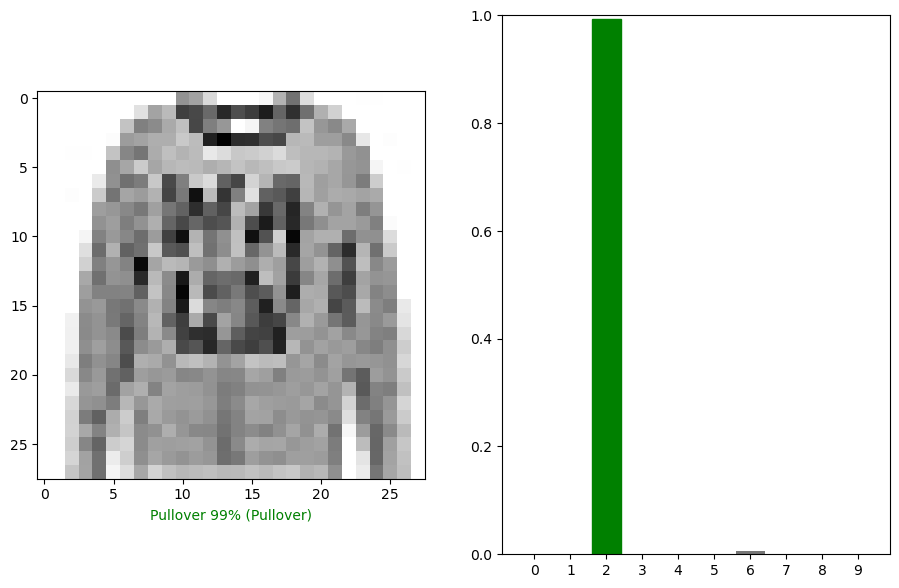

In [ ]:
#Ploting an example: X test image, the predicted label, and the true label.
#if the prediction is correct i.e, matches the true label then the color is green, if not it's red
i=500  #the index varies from 0 to 9999 (10,000 images in the test dataset)

y_result= np.argmax(predictions[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_result== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_result], 100*np.max(predictions[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_result].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.show()

In [ ]:
#plotting functions
def plot_image(i, predictions, y_test, x_test):
  y_test, x_test = y_test[i], x_test[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(x_test, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  if predicted_label == y_test:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[y_test]),
                                color=color)

def plot_value_array(i, predictions, y_test):
  y_test = y_test[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('red')
  thisplot[y_test].set_color('green')

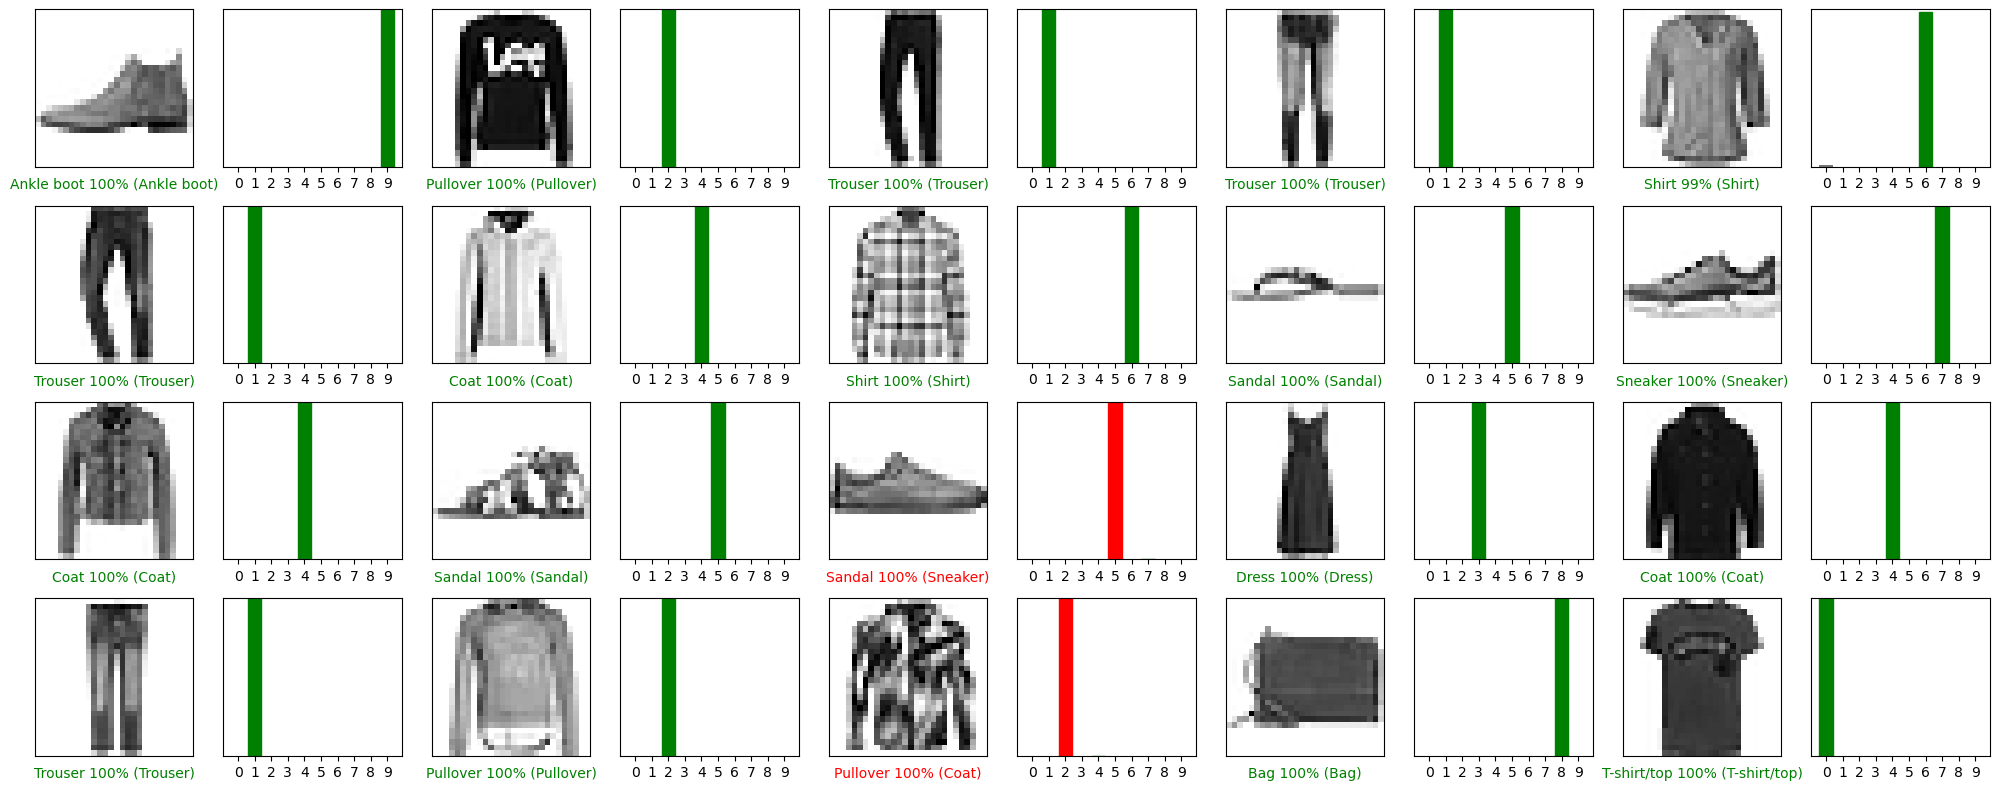

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**SUM UP:**
- A model with one hidden layer of 128 units, RELU activation function. And softmax activation layer. Optimazer: **Adam**. Learning rate: **0.001** (By default in Adam optimizer). Regularization: **None**.

Accuracy on the training set: **98,4%**

Accuracy on the testing set: **88,63%**

- This trained model is slightly overfitted => Calls for the need to apply regularization.

>**This is an overfitting situation** 




---





In [ ]:
model_L2 = tf.keras.Sequential()
model_L2.add(tf.keras.layers.Flatten())
model_L2.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model_L2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_L2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model_L2.fit(x_train, y_train, epochs=30)  

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9426 - accuracy: 0.7802
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7088 - accuracy: 0.7972
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6862 - accuracy: 0.8028
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6585 - accuracy: 0.8083
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6392 - accuracy: 0.8156
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6308 - accuracy: 0.8158
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6175 - accuracy: 0.8200
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6075 - accuracy: 0.8246
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6006 - accuracy: 0.8240
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.591

In [ ]:
test_loss, test_acc = model_L2.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5465 - accuracy: 0.8385 - 686ms/epoch - 2ms/step

Test accuracy: 0.8385000228881836


313/313 [==============================] - 1s 2ms/step


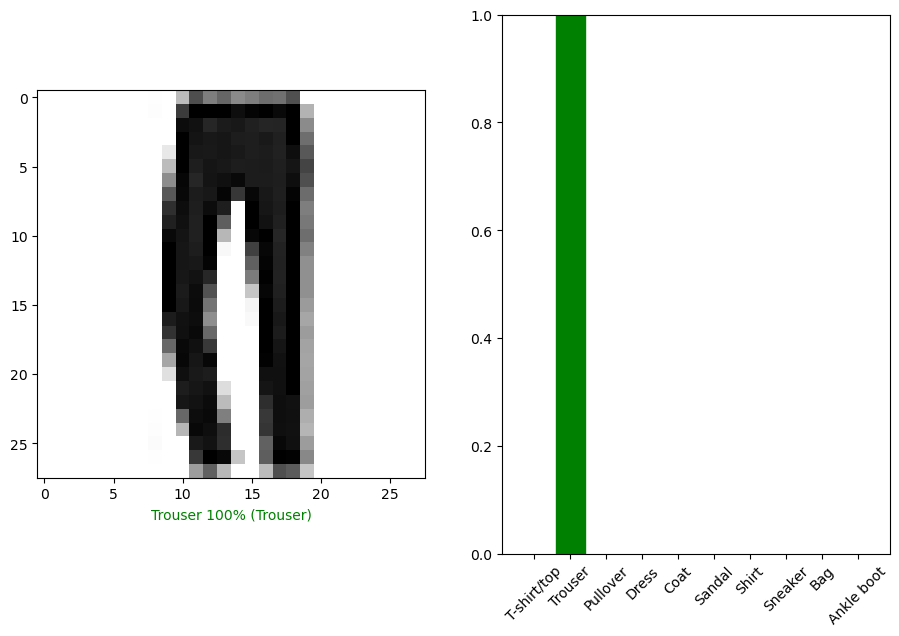

In [ ]:
result = tf.keras.Sequential([model_L2])
predictions = result.predict(x_test)

i=2  # varies from 0 to 9999

y_result= np.argmax(predictions[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_result== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_result], 100*np.max(predictions[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_result].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

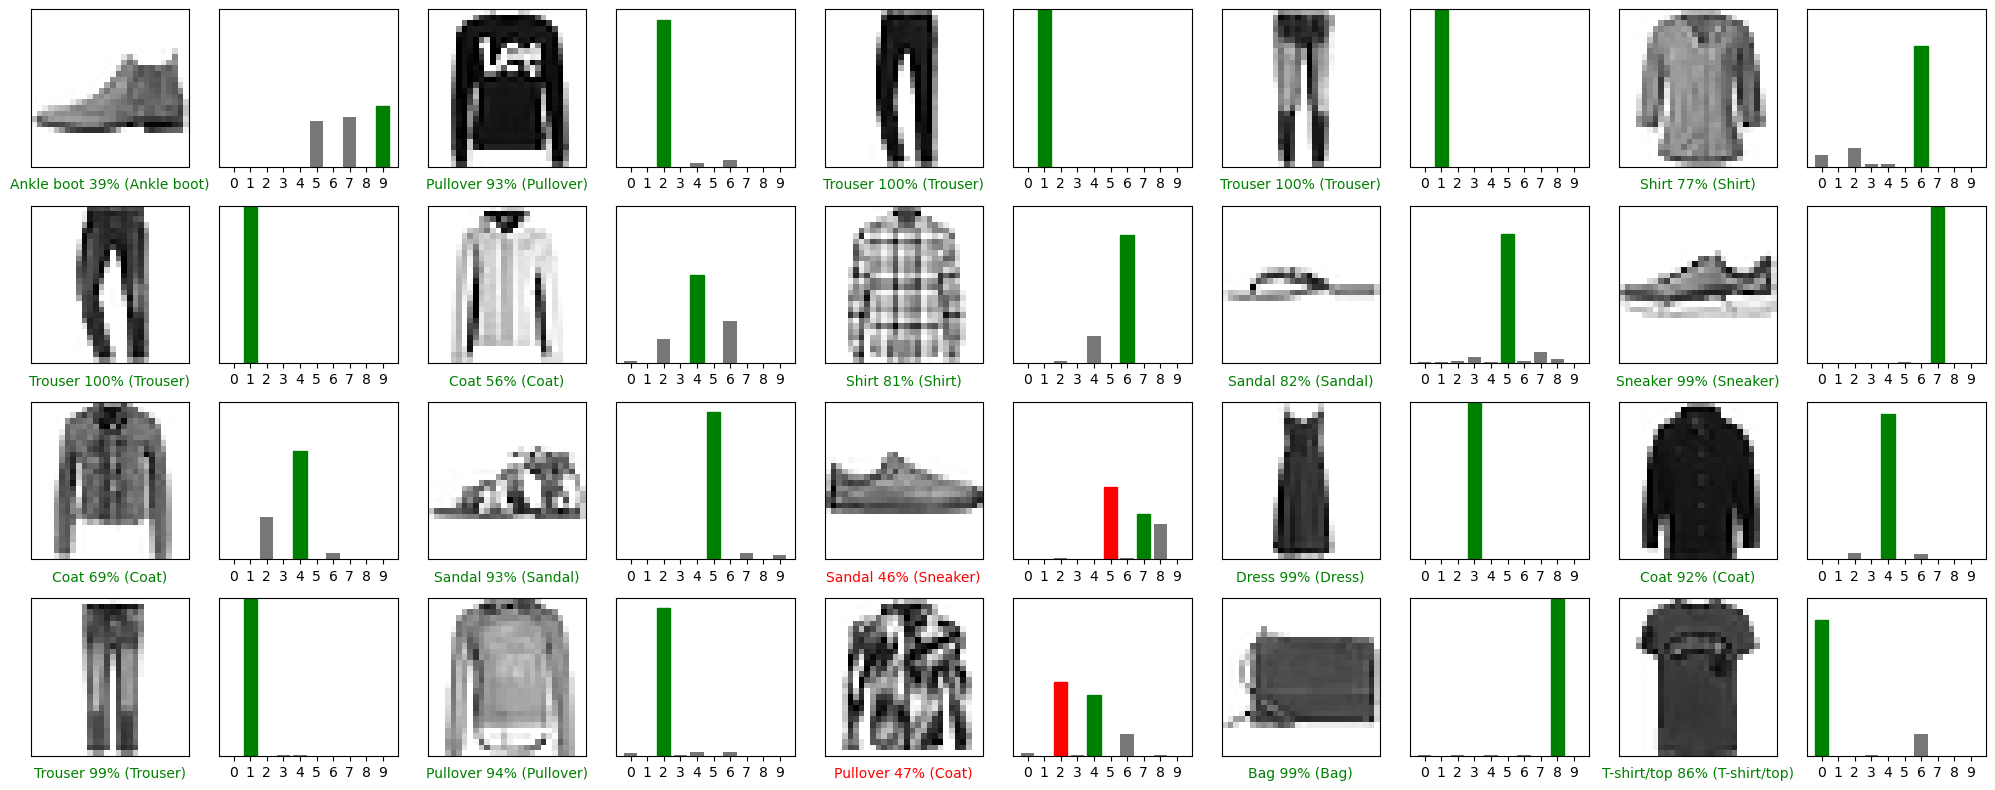

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**SUM UP:**
- A model with one hidden layer of 128 units, RELU activation function. And softmax activation layer. Optimazer: **Adam**. Learning rate: **0.001** (By default in Adam optimizer). Regularization: **L2(0.015)**.

Accuracy on the training set: **83,63%**

Accuracy on the testing set: **83,85%**

- The L2 regularization definitely helped overcoming the overfitting we had before. Yet the model had showen a decrease in the accuracy => Calls for the need to play on other hyperparameters...

**This is a solution to the previous overfitting situation = Regulariation**



---



In [ ]:
model_Dropout = tf.keras.Sequential()
model_Dropout.add(tf.keras.layers.Flatten())
model_Dropout.add(tf.keras.layers.Dense(192, activation='relu'))
model_Dropout.add(tf.keras.layers.Dropout(0.4))
model_Dropout.add(tf.keras.layers.Dense(10, activation='softmax'))

model_Dropout.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=30)  

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5547 - accuracy: 0.8021
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4320 - accuracy: 0.8429
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.8540
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8616
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8671
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3491 - accuracy: 0.8712
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3386 - accuracy: 0.8755
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3310 - accuracy: 0.8787
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3273 - accuracy: 0.8803
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.317

In [ ]:
test_loss, test_acc = model_Dropout.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3458 - accuracy: 0.8902 - 705ms/epoch - 2ms/step

Test accuracy: 0.8902000188827515


313/313 [==============================] - 1s 2ms/step


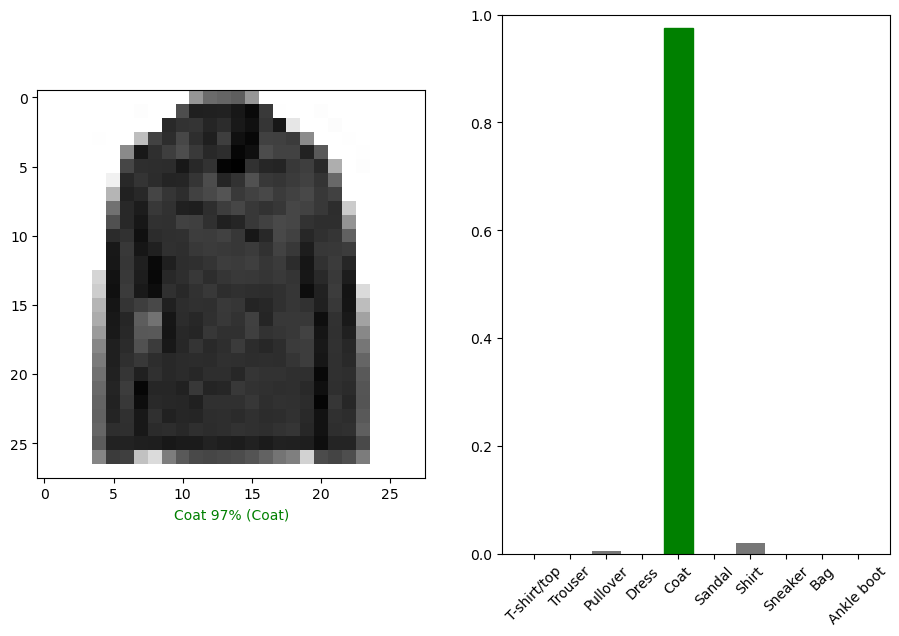

In [ ]:
result = tf.keras.Sequential([model_Dropout])
predictions = result.predict(x_test)

i=405  # varies from 0 to 9999

y_result= np.argmax(predictions[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_result== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_result], 100*np.max(predictions[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_result].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

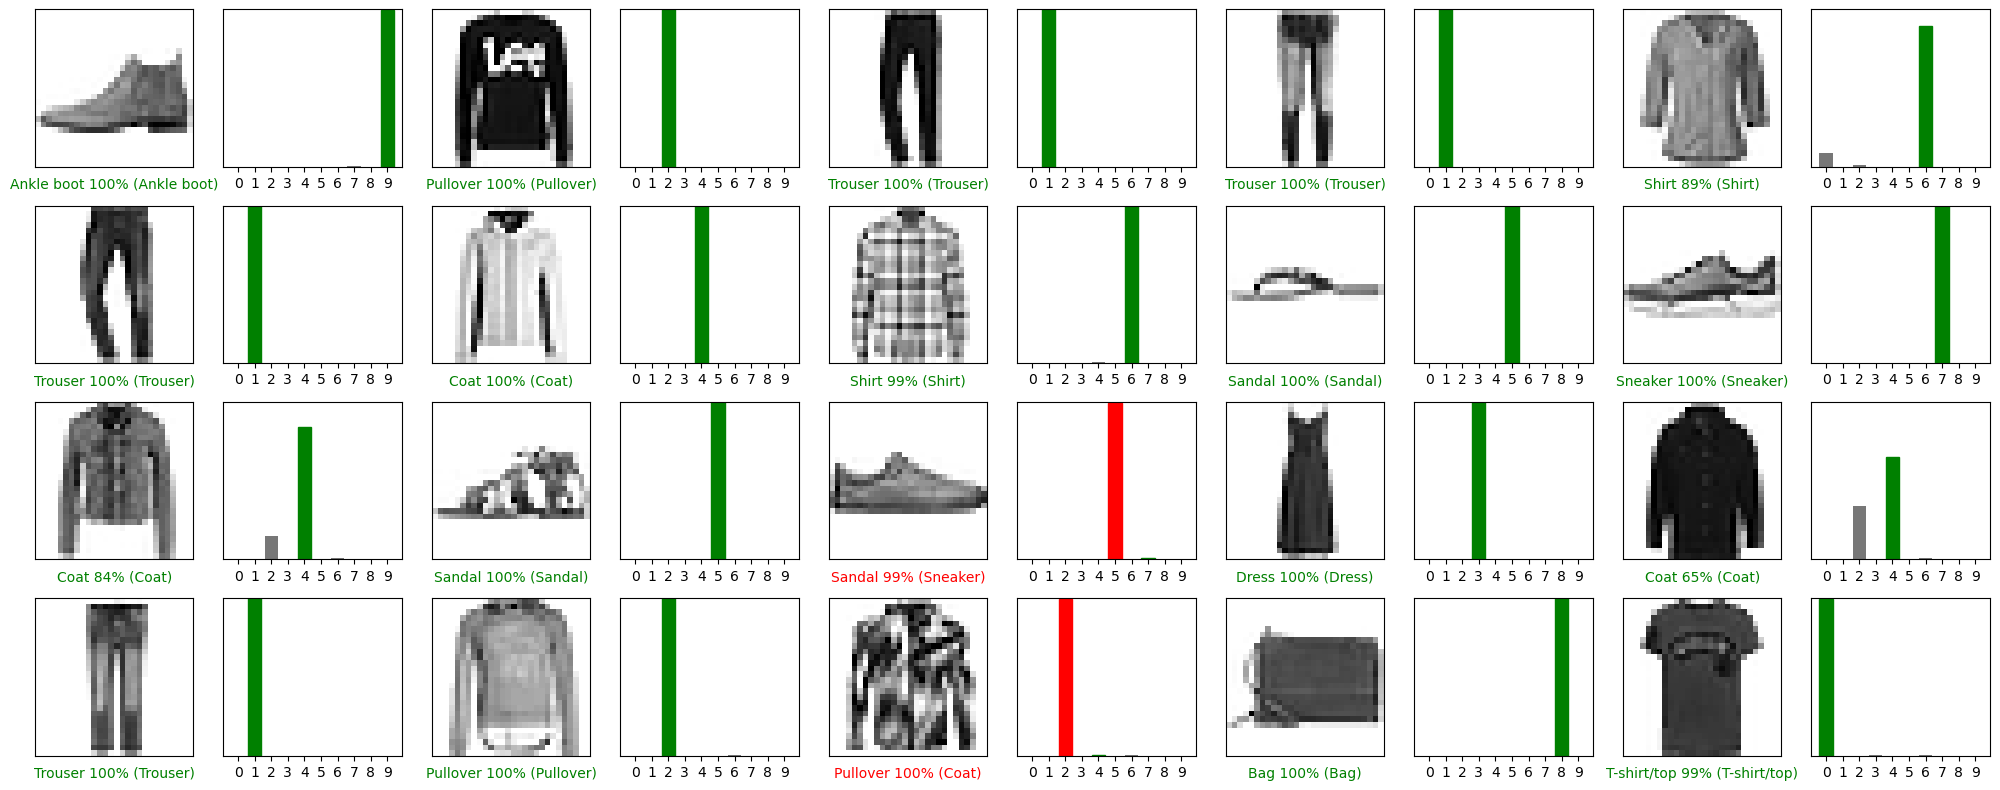

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**SUM UP:**
- A model with one hidden layer of 192 units, RELU activation function. And softmax activation layer. Optimazer: **Adam**. Learning rate: **0,001** (Adam optimizer default value). Regularization: **Dropout(0,04)**.

Accuracy on the training set: **90,44%**

Accuracy on the testing set: **89,02%**

- Overcoming overfitting yet keeping a good performance => Let's play on the rest of the hyperparameters aiming for a better perfomance.



---



In [ ]:
model_sgd = tf.keras.Sequential()
model_sgd.add(tf.keras.layers.Flatten())
model_sgd.add(tf.keras.layers.Dense(256, activation='relu'))
model_sgd.add(tf.keras.layers.Dropout(0.45))
model_sgd.add(tf.keras.layers.Dense(10, activation='softmax'))

model_sgd.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='sgd',
             metrics=['accuracy'])

model_sgd.fit(x_train, y_train, epochs=20)  
test_loss, test_acc = model_sgd.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8272 - accuracy: 0.7209
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5775 - accuracy: 0.8042
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5215 - accuracy: 0.8221
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4850 - accuracy: 0.8322
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4605 - accuracy: 0.8396
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8443
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4299 - accuracy: 0.8482
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8538
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4091 - accuracy: 0.8565
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.400

313/313 [==============================] - 1s 2ms/step


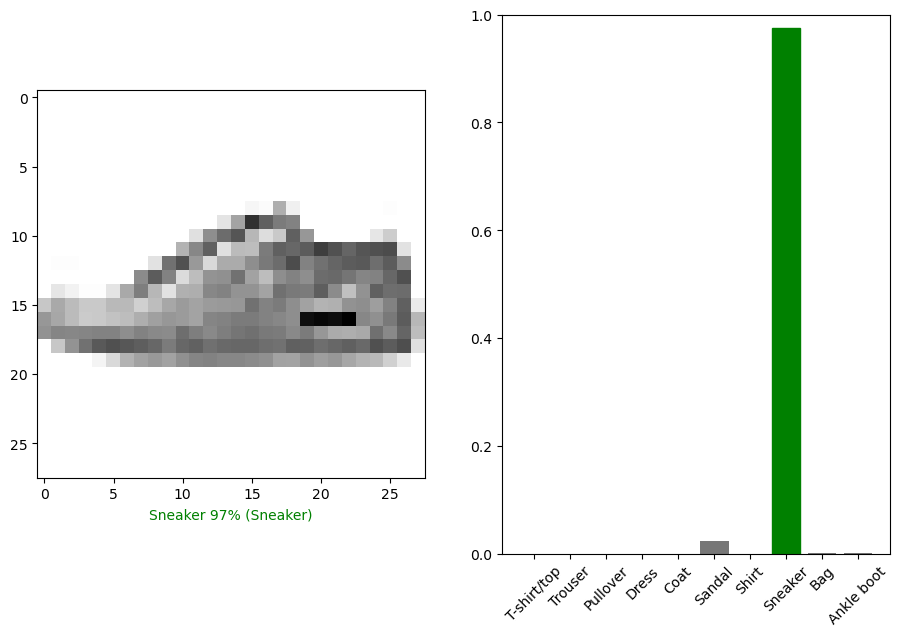

In [ ]:
result = tf.keras.Sequential([model_sgd])
predictions = result.predict(x_test)

i=879  # varies from 0 to 9999

y_result= np.argmax(predictions[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_result== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_result], 100*np.max(predictions[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_result].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

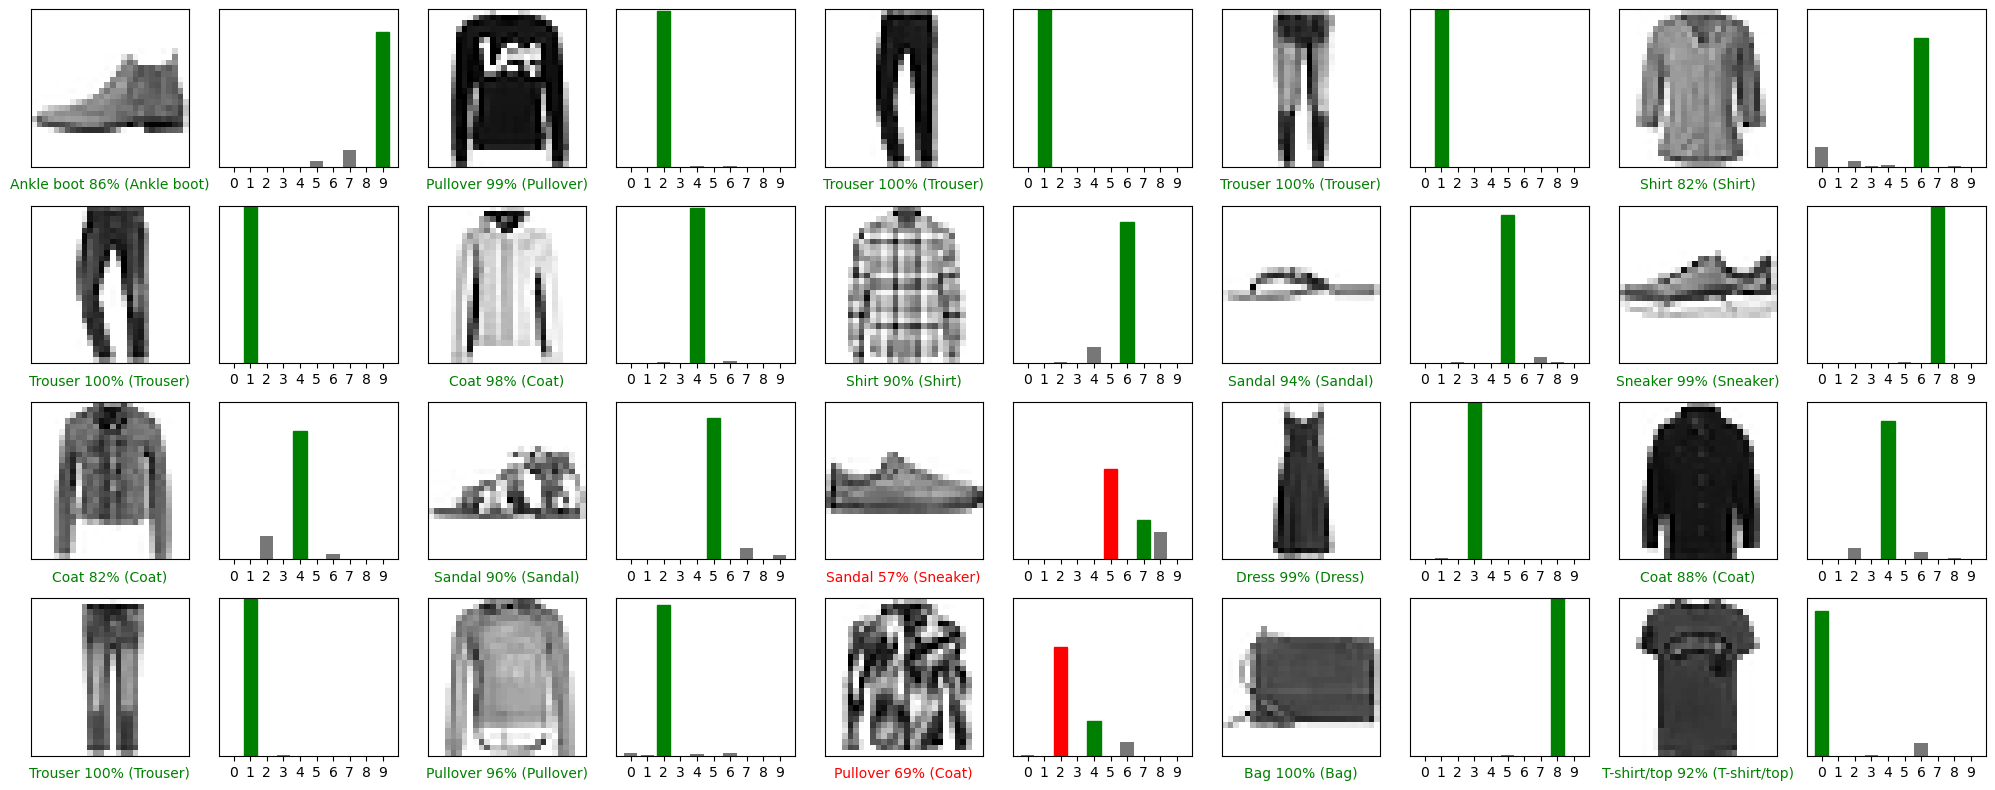

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**SUM UP:**
- A model with one hidden layer of 256 units, RELU activation function. And softmax activation layer. Optimazer: **sgd**. Learning rate: **0,01** (SGD optimizer default value). Regularization: **Dropout(0,4)**.

Accuracy on the training set: **87,77%**

Accuracy on the testing set: **87,05%**

- As we're applying regularization the model is as expected well fitted. The model performance has decreased slightly => Calls for the need to play on other paramerters: Learning rate! (0.01 is somehow a bih learning rate).



---



In [ ]:
model_sgd_LR = tf.keras.Sequential()
model_sgd_LR.add(tf.keras.layers.Flatten())
model_sgd_LR.add(tf.keras.layers.Dense(256, activation='relu'))
model_sgd_LR.add(tf.keras.layers.Dropout(0.35))
model_sgd_LR.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.005)
model_sgd_LR.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='sgd',
             metrics=['accuracy'])

model_sgd_LR.fit(x_train, y_train, epochs=35)  
test_loss, test_acc = model_sgd_LR.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/35
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8188 - accuracy: 0.7270
Epoch 2/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5659 - accuracy: 0.8059
Epoch 3/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5058 - accuracy: 0.8256
Epoch 4/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4760 - accuracy: 0.8346
Epoch 5/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4506 - accuracy: 0.8428
Epoch 6/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4325 - accuracy: 0.8489
Epoch 7/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4177 - accuracy: 0.8529
Epoch 8/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4073 - accuracy: 0.8568
Epoch 9/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3977 - accuracy: 0.8599
Epoch 10/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.388

313/313 [==============================] - 1s 2ms/step


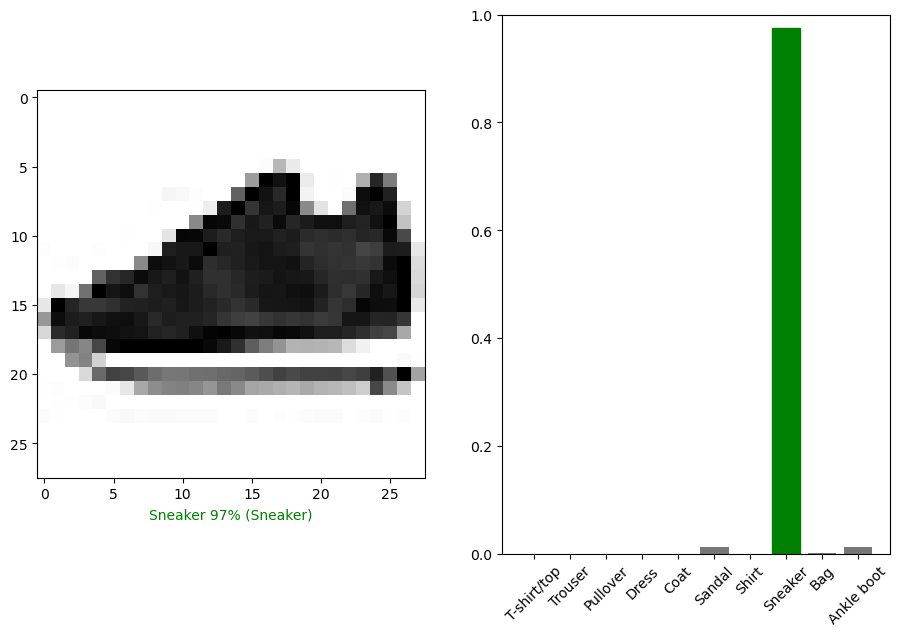

In [ ]:
resultt = tf.keras.Sequential([model_sgd_LR])
predictions = resultt.predict(x_test)

i=899  # varies from 0 to 9999

y_resultt= np.argmax(predictions[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_resultt== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_resultt], 100*np.max(predictions[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictions[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_resultt].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

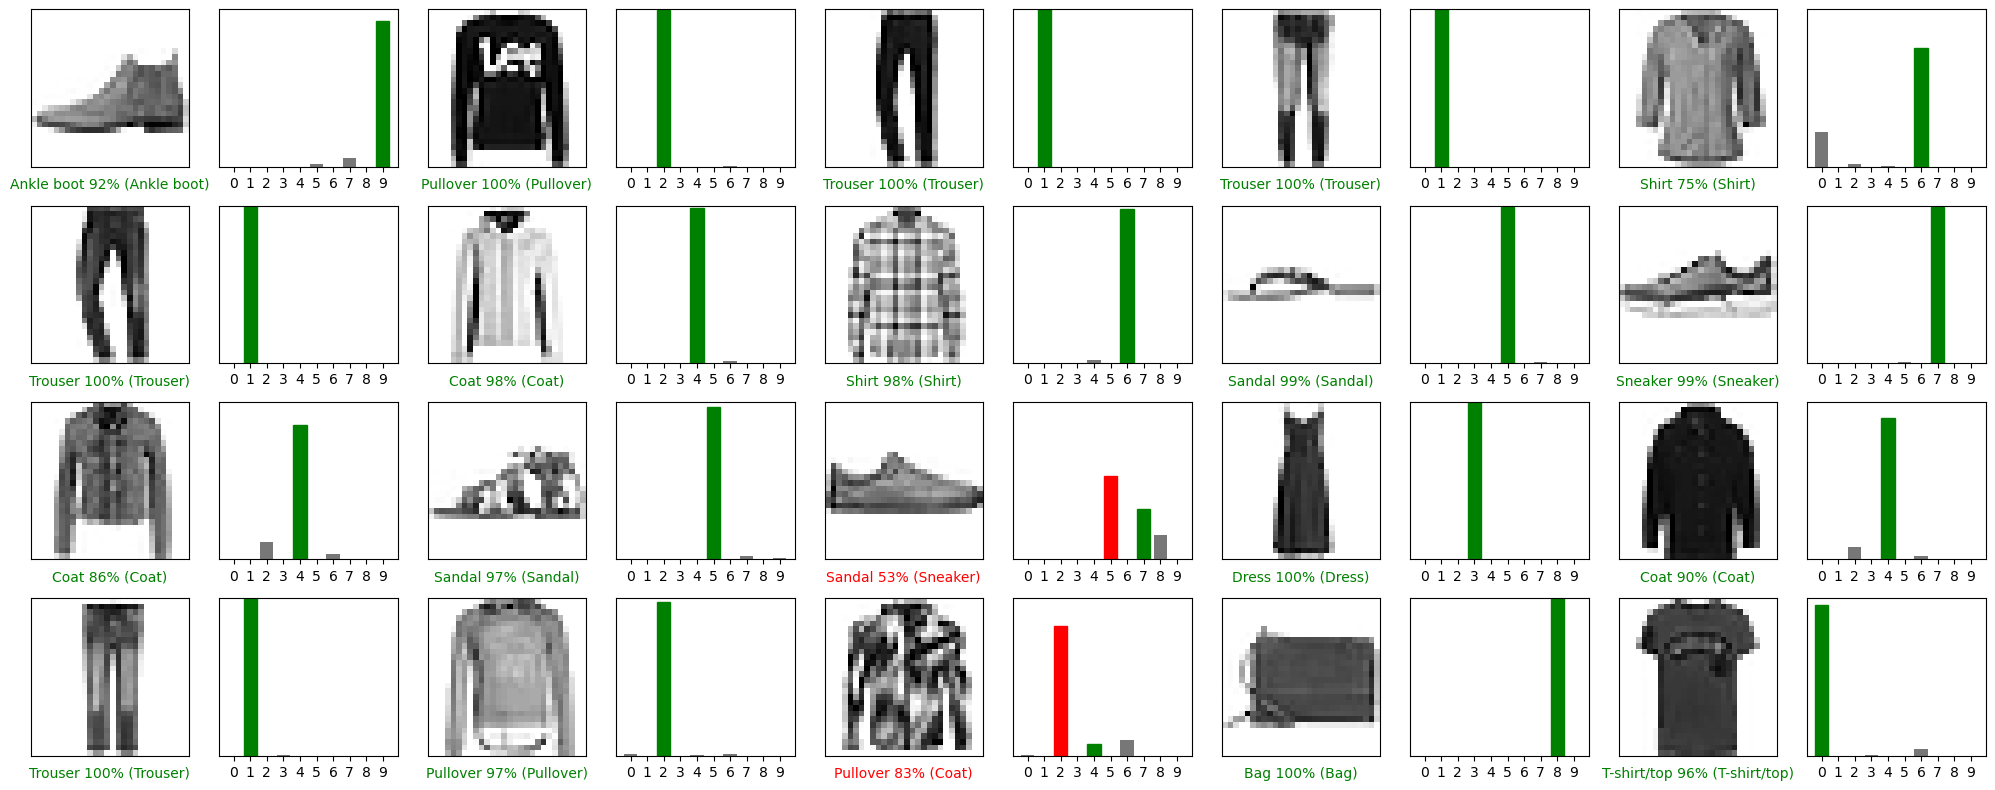

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**SUM UP:**
- A model with one hidden layer of 256 units, RELU activation function. And softmax activation layer. Optimazer: **sgd**. Learning rate: **0,005** . Regularization: **Dropout(0,35)**.

Accuracy on the training set: **89,43%**

Accuracy on the testing set: **88,1%**

- The model performance has increased as we're trying with a lower learning rate, while adjusting the regulizer so that we don't fall in an overfitting situation. From the other hand this requires an increase in the epochs number 



---



In [ ]:
model_sgd_LR = tf.keras.Sequential()
model_sgd_LR.add(tf.keras.layers.Flatten())
model_sgd_LR.add(tf.keras.layers.Dense(256, activation='relu'))
model_sgd_LR.add(tf.keras.layers.Dropout(0.35))
model_sgd_LR.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.005)
model_sgd_LR.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='RMSProp',
             metrics=['accuracy'])

model_sgd_LR.fit(x_train, y_train, epochs=35)  
test_loss, test_acc = model_sgd_LR.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5444 - accuracy: 0.8056
Epoch 2/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4311 - accuracy: 0.8492
Epoch 3/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4057 - accuracy: 0.8594
Epoch 4/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3960 - accuracy: 0.8648
Epoch 5/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3853 - accuracy: 0.8701
Epoch 6/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8717
Epoch 7/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8739
Epoch 8/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8755
Epoch 9/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3758 - accuracy: 0.8784
Epoch 10/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.371

**SUM UP:**
- A model with one hidden layer of 256 units, RELU activation function. And softmax activation layer. Optimazer: **RMSProp**. Learning rate: **0,005** . Regularization: **Dropout(0,35)**.

Accuracy on the training set: **90,24%**

Accuracy on the testing set: **87,72%**

- Comparing the optimizers SGD with RMSProp, we can see that the accuracy for the train set increased at the price of a high variance: we can see more overfitting here.\
 => Now that we've seen the impact of some of these hyperparameters on the model performance, let's find a model with the best accuracy.



---



In [ ]:
model_best = tf.keras.Sequential()
model_best.add(tf.keras.layers.Flatten())
model_best.add(tf.keras.layers.Dense(256, activation='relu'))
model_best.add(tf.keras.layers.Dropout(0.35))
model_best.add(tf.keras.layers.Dense(128, activation='relu'))
model_best.add(tf.keras.layers.Dense(10, activation='softmax'))

model_best.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

model_best.fit(x_train, y_train, epochs=35)  
test_loss, test_acc = model_best.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/35
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5461 - accuracy: 0.8018
Epoch 2/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4243 - accuracy: 0.8450
Epoch 3/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3896 - accuracy: 0.8567
Epoch 4/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3664 - accuracy: 0.8647
Epoch 5/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3528 - accuracy: 0.8692
Epoch 6/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3385 - accuracy: 0.8735
Epoch 7/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3299 - accuracy: 0.8763
Epoch 8/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3198 - accuracy: 0.8815
Epoch 9/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3150 - accuracy: 0.8825
Epoch 10/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.306

**SUM UP:**
- Added one more hidden layer: layers of 256 and 128 units respectively, RELU activation function. And softmax activation layer. Optimazer: **adam**. Learning rate: **0,005** . Regularization: **Dropout(0,35)** on the 1st hidden layer.

Accuracy on the training set: **91,56%**

Accuracy on the testing set: **89,52%**

- The model performance has increased as we're trying with a lower learning rate, while adjusting the regulizer so that we don't fall in an overfitting situation. From the other hand this requires an increase in the epochs number => Now that we've seen the impact of some of these hyperparameters on the model performance, let's find a model with the best accuracy.



---



In [ ]:
model_3HL = tf.keras.Sequential()
model_3HL.add(tf.keras.layers.Flatten())
model_3HL.add(tf.keras.layers.Dense(256, activation='relu'))
model_3HL.add(tf.keras.layers.Dropout(0.5))
model_3HL.add(tf.keras.layers.Dense(192, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model_3HL.add(tf.keras.layers.Dense(128, activation='relu'))
model_3HL.add(tf.keras.layers.Dense(10, activation='softmax'))

adam=tf.keras.optimizers.Adam(learning_rate=0.0001)
model_3HL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=adam,
             metrics=['accuracy'])

model_3HL.fit(x_train, y_train, epochs=50)  
test_loss, test_acc = model_3HL.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3835 - accuracy: 0.7203
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8392 - accuracy: 0.8165
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6073 - accuracy: 0.8339
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5208 - accuracy: 0.8442
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4790 - accuracy: 0.8506
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4512 - accuracy: 0.8552
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4321 - accuracy: 0.8598
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4181 - accuracy: 0.8633
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4063 - accuracy: 0.8666
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.394

**SUM UP:**
- A model with 3 hidden layers of 256, 192 and 128 units respectvely, RELU activation function. And softmax activation layer. Optimazer: **adam**. Learning rate: **0,005** . Regularization: **Dropout(0,35)** on the 1st hidden layer and **L2(0.02)** on the 2nd.

Accuracy on the training set: **90,78%**

Accuracy on the testing set: **89,27%**

- Overcoming the overfitting situation but with less accuracy

---



In [ ]:
model_L23 = tf.keras.Sequential()
model_L23.add(tf.keras.layers.Flatten())
model_L23.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model_L23.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model_L23.add(tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model_L23.add(tf.keras.layers.Dense(10, activation='softmax'))

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model_L23.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=adam,
             metrics=['accuracy'])

model_L23.fit(x_train, y_train, epochs=50)  
test_loss, test_acc = model_L23.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4673 - accuracy: 0.7509
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8617 - accuracy: 0.7850
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8036 - accuracy: 0.7928
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7676 - accuracy: 0.8014
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7386 - accuracy: 0.8072
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7195 - accuracy: 0.8105
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7046 - accuracy: 0.8136
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6945 - accuracy: 0.8169
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6889 - accuracy: 0.8156
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.681

**SUM UP:**
- A model with 3 hidden layers of 256, 128 and 100 units respectvely, RELU activation function. And softmax activation layer. Optimazer: **adam**. Learning rate: **0,005** . Regularization: **L2(0.02)** on all the hidden layers.

Accuracy on the training set: **82,76%**

Accuracy on the testing set: **80,54%**

- As we've seen before, L2 regularization isn't as much effective as Dropout. So we're keeping dropout.
---



In [ ]:
model_drop1 = tf.keras.Sequential()
model_drop1.add(tf.keras.layers.Flatten())
model_drop1.add(tf.keras.layers.Dense(256, activation='relu'))
model_drop1.add(tf.keras.layers.Dense(128, activation='relu'))
model_drop1.add(tf.keras.layers.Dropout(0.15))
model_drop1.add(tf.keras.layers.Dense(100, activation='relu'))
model_drop1.add(tf.keras.layers.Dropout(0.15))
model_drop1.add(tf.keras.layers.Dense(10, activation='softmax'))

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model_drop1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=adam,
             metrics=['accuracy'])

model_drop1.fit(x_train, y_train, epochs=50)  
test_loss, test_acc = model_drop1.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5186 - accuracy: 0.8113
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3846 - accuracy: 0.8605
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3481 - accuracy: 0.8725
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3222 - accuracy: 0.8809
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3055 - accuracy: 0.8874
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2929 - accuracy: 0.8923
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2790 - accuracy: 0.8955
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2724 - accuracy: 0.8983
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2607 - accuracy: 0.9026
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.252

**SUM UP:**
- A model with 3 hidden layers of 256, 192 and 128 units respectvely, RELU activation function. And softmax activation layer. Optimazer: **adam**. Learning rate: **0,005** . Regularization: **Dropout(0,15)** on the 1st and 2nd hidden layer.

Accuracy on the training set: **94,98%**

Accuracy on the testing set: **89,86%**

- Increased accuracy but with a slight overfitting.

---



In [ ]:
model_drop25 = tf.keras.Sequential()
model_drop25.add(tf.keras.layers.Flatten())
model_drop25.add(tf.keras.layers.Dense(256, activation='relu'))
model_drop25.add(tf.keras.layers.Dropout(0.2))
model_drop25.add(tf.keras.layers.Dense(128, activation='relu'))
model_drop25.add(tf.keras.layers.Dropout(0.2))
model_drop25.add(tf.keras.layers.Dense(100, activation='relu'))
model_drop25.add(tf.keras.layers.Dropout(0.2))
model_drop25.add(tf.keras.layers.Dense(10, activation='softmax'))

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model_drop25.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=adam,
             metrics=['accuracy'])

model_drop25.fit(x_train, y_train, epochs=50)  
test_loss, test_acc = model_drop25.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5748 - accuracy: 0.7942
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4249 - accuracy: 0.8468
Epoch 3/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3918 - accuracy: 0.8583
Epoch 4/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3707 - accuracy: 0.8650
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3526 - accuracy: 0.8703
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3388 - accuracy: 0.8783
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3283 - accuracy: 0.8815
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3154 - accuracy: 0.8848
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3119 - accuracy: 0.8859
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.303

Here we added the dropout regularization on **all the hidden layers**, leaving with:

Accuracy on the training set: **92,32%**

Accuracy on the testing set: **89,19%**

Which is a good compromize between bias and variance.

313/313 [==============================] - 1s 2ms/step


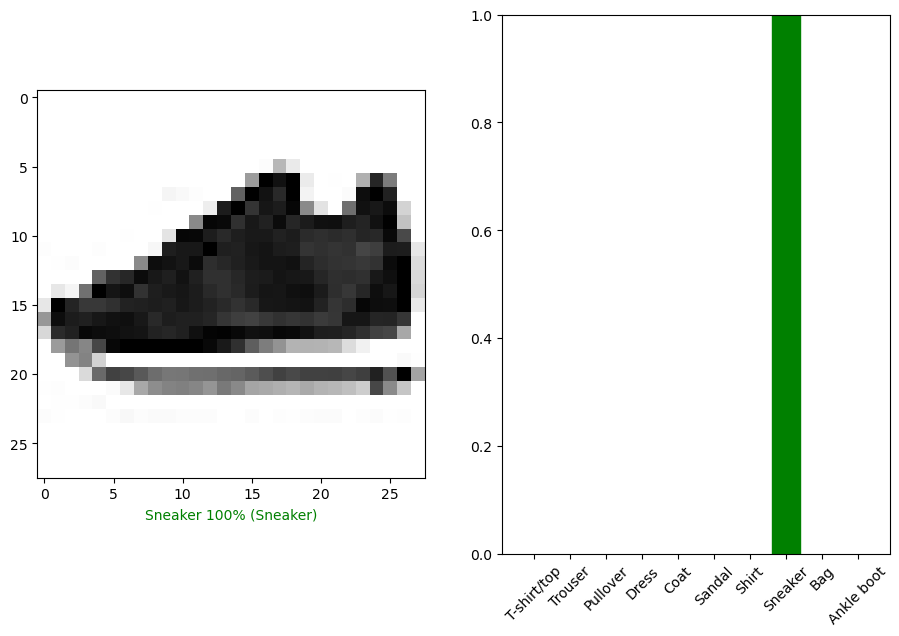

In [ ]:
resultt = tf.keras.Sequential([model_drop25])
predictionss = resultt.predict(x_test)

i=899  # varies from 0 to 9999

y_resultt= np.argmax(predictionss[i])
plt.figure(figsize=(11,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,1)
plt.imshow(x_test[i], cmap=plt.cm.binary)
if y_resultt== y_test[i]:
  color = 'green'
else:
  color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_resultt], 100*np.max(predictionss[i]), class_names[y_test[i]]), color=color)

plt.subplot(1,2,2)
plt.xticks(range(10))
thisplot = plt.bar(range(10), predictionss[i], color="#777777")
plt.ylim([0, 1])
thisplot[y_resultt].set_color('red')
thisplot[y_test[i]].set_color('green')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

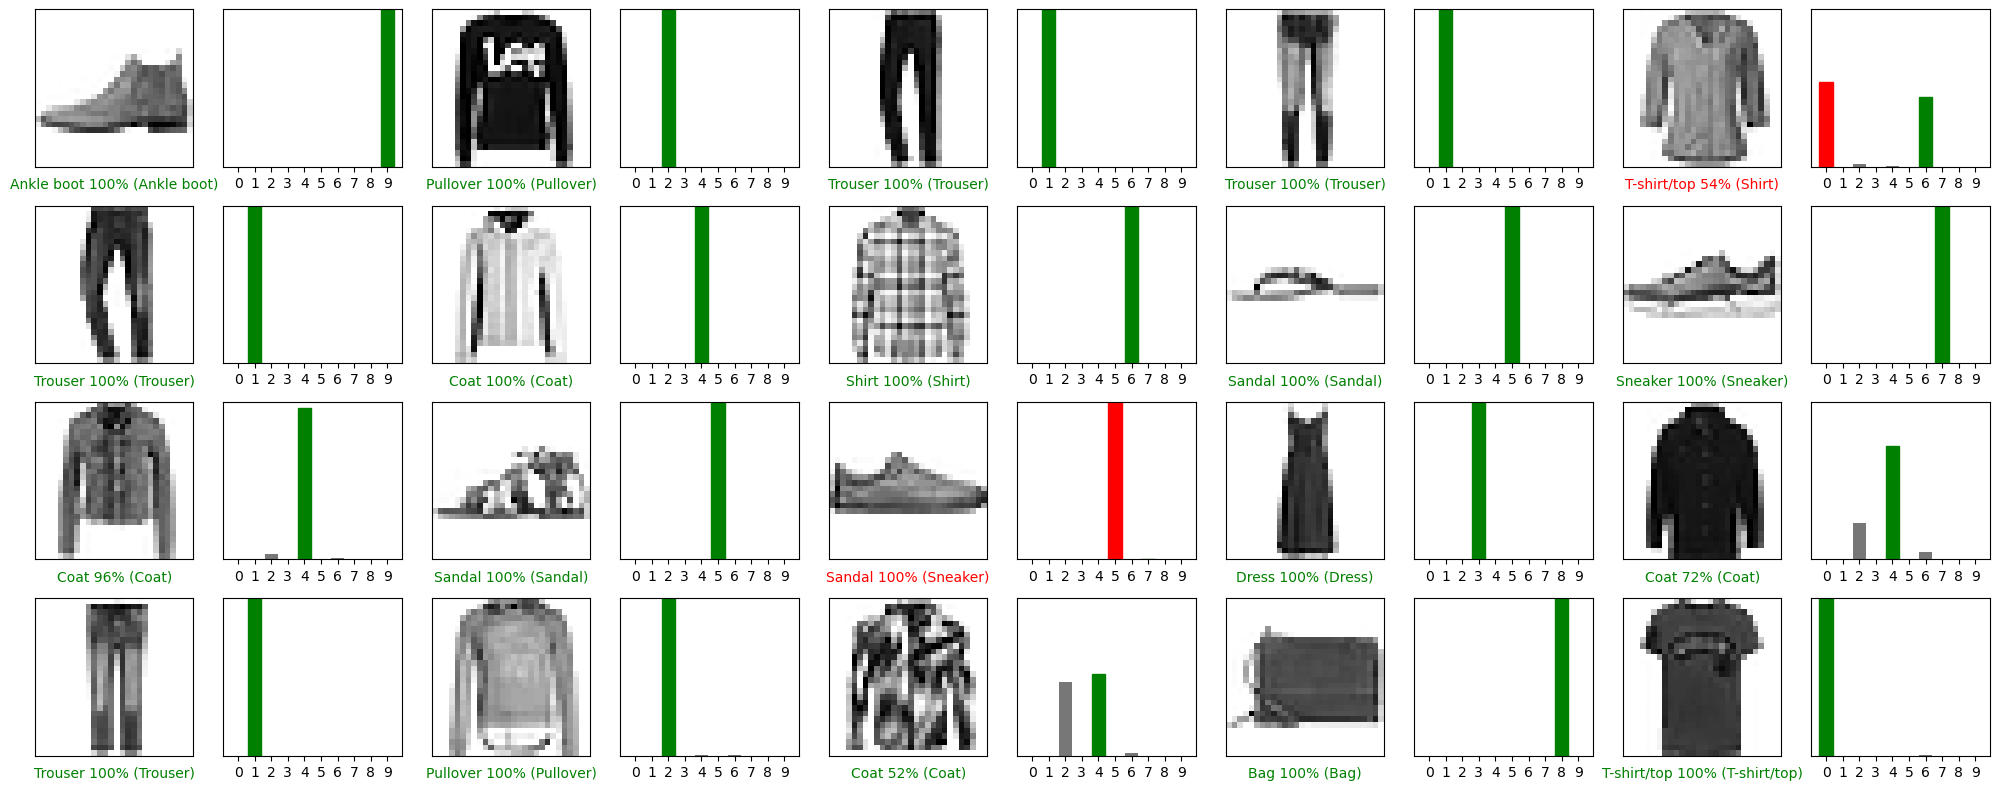

In [ ]:
#plotting a set of examples for an overall view on the results
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionss[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionss[i], y_test)
plt.tight_layout()
plt.show()